## Imports and setups

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.compose import FeatureCreation
from gtime.plotting import season_ts, subplots, lagplot

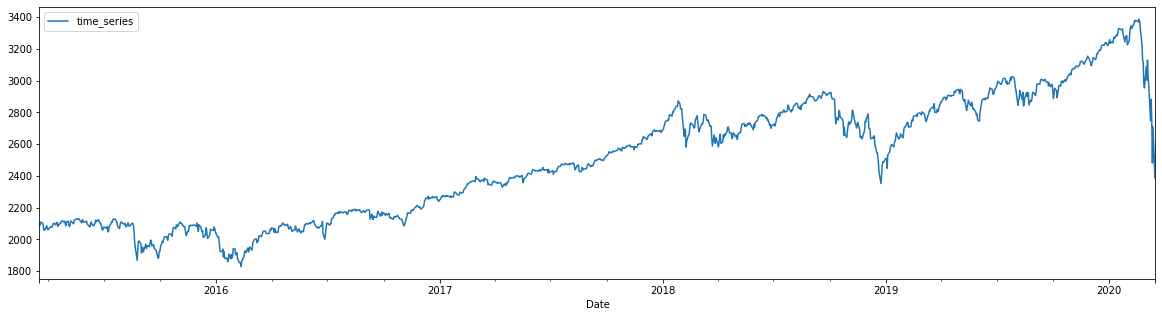

In [2]:
df_sp = pd.read_csv('data/^GSPC.csv')
df_close = df_sp.set_index('Date')['Close']
df_close.index = pd.to_datetime(df_close.index)
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
period_index_time_series.plot(figsize=(20, 5))
df = period_index_time_series.resample('D').fillna(method='ffill')
plt.show()

## EDA

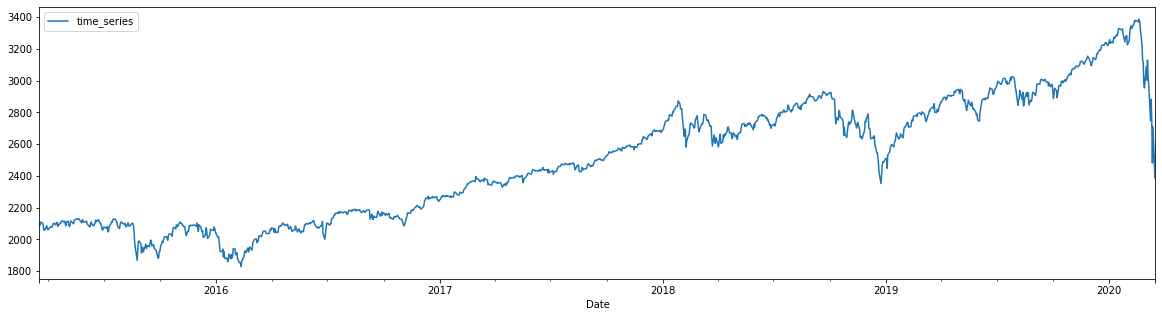

In [3]:
# basic plot
period_index_time_series.plot(figsize=(20, 5))
plt.show()

/Users/semyonburyachenko/Documents/Upwork/Giotto/venv/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


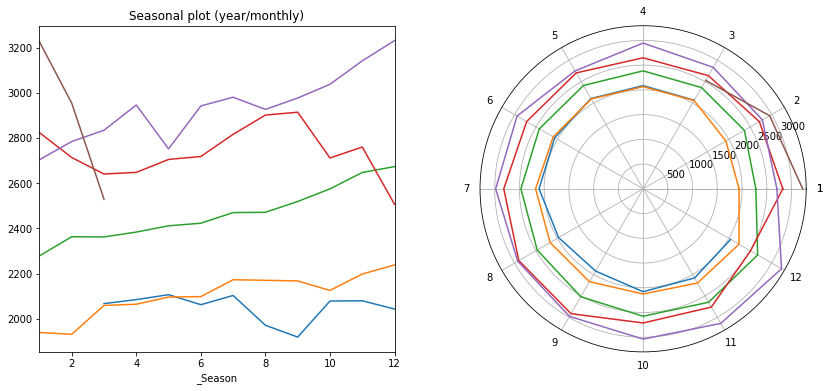

In [4]:
# Seasonal plots
fig = plt.figure(figsize=(14, 6))
m1 = fig.add_subplot(121, title='Seasonal plot (year/monthly)')
season_ts(df.resample('M').last(), 'year', ax=m1)
m2 = fig.add_subplot(122, projection='polar')
season_ts(df.resample('M').last(), 'year', ax=m2, polar=True);

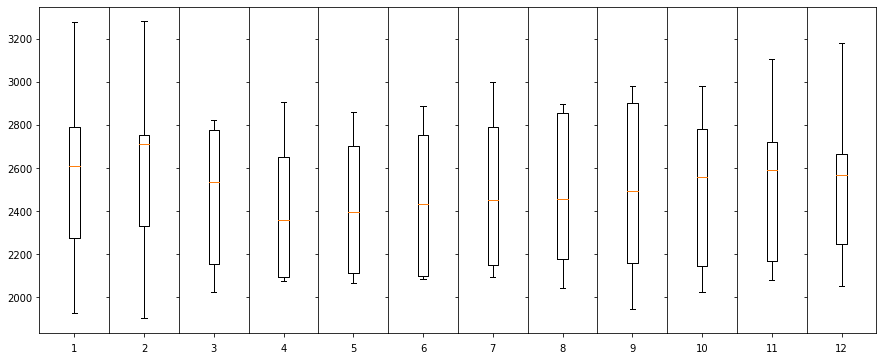

In [20]:
subplots(df, 'year', 'M', box=True)

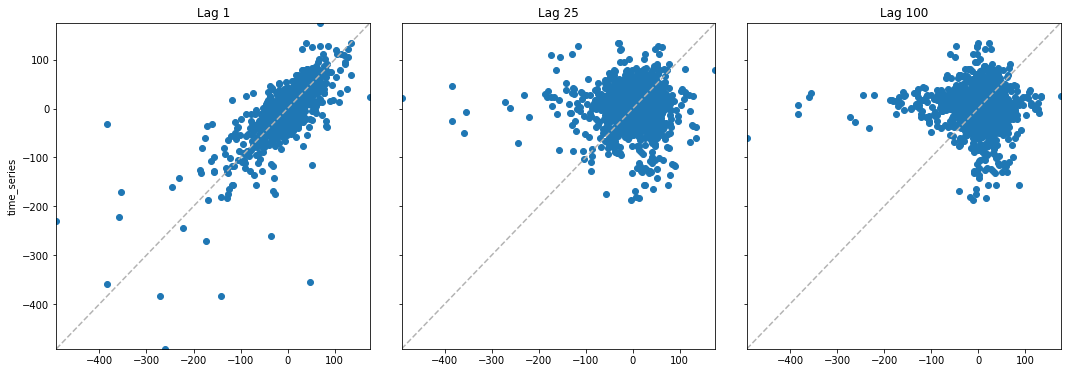

In [23]:
lagplot(df.diff(5), lags=[1, 25, 100])